# Changing Seasonality

In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

Importing plotly failed. Interactive plots will not work.


In [2]:

df = pd.read_csv('../Data/airline_passengers.csv')

In [3]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


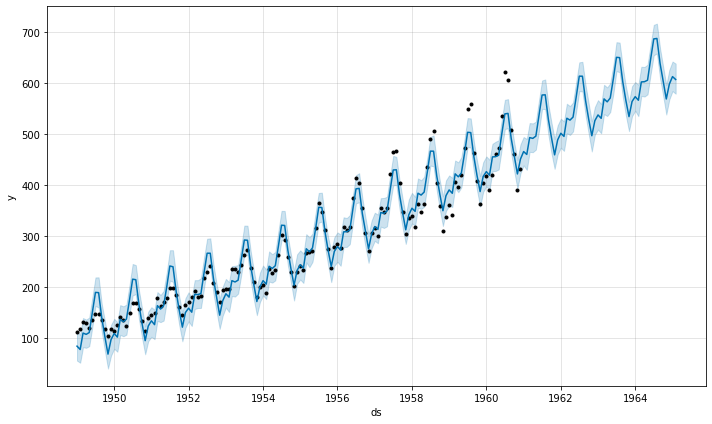

In [5]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality.

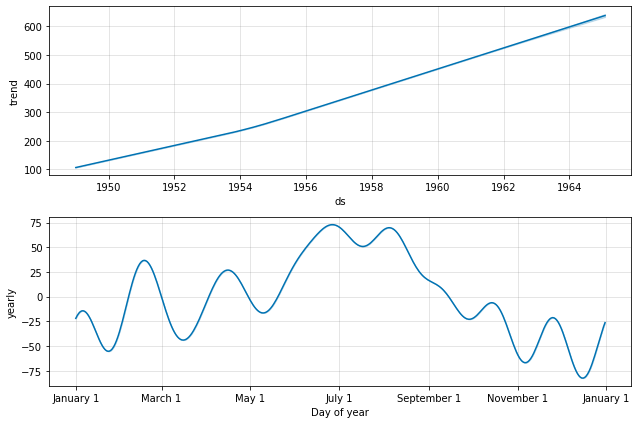

In [6]:
fig = m.plot_components(forecast)

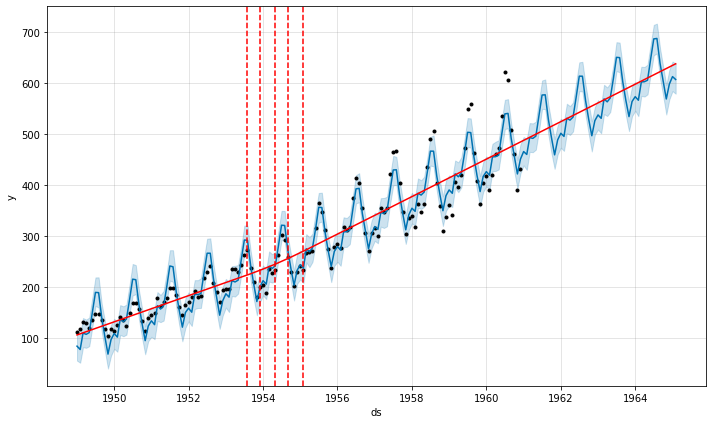

In [7]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Change to Multiplicative 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


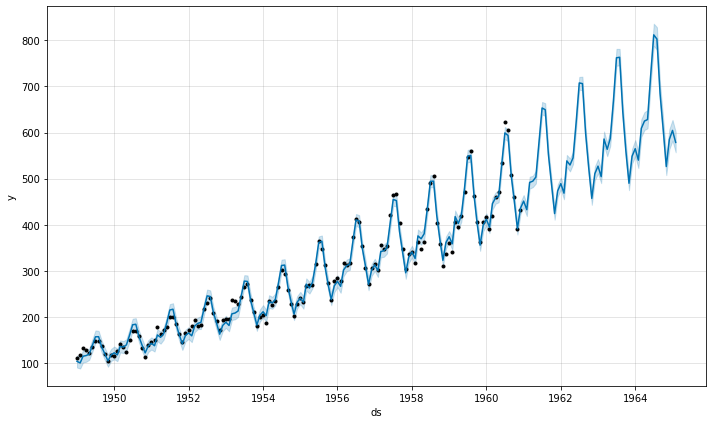

In [8]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

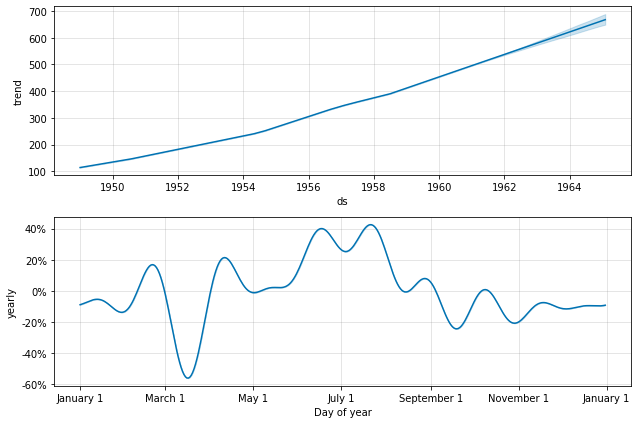

In [9]:
fig = m.plot_components(forecast)

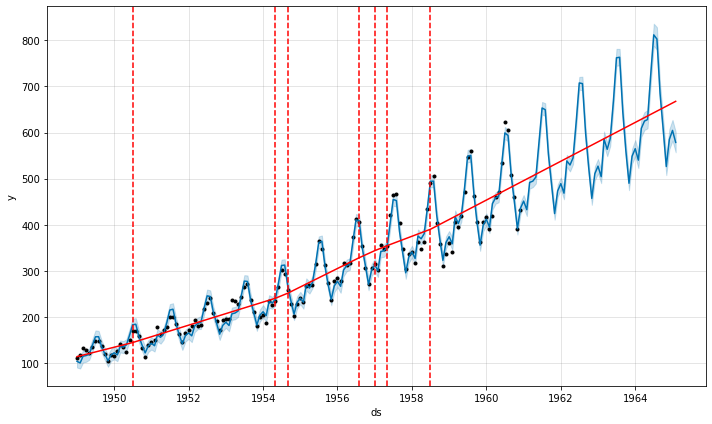

In [10]:
fig = m.plot(forecast);
a= add_changepoints_to_plot(fig.gca(), m, forecast)

In [11]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [12]:
for i in ['additive', 'multiplicative']:
    model = Prophet(seasonality_mode=i)
    model.fit(train)
    future = model.make_future_dataframe(12, freq='MS')
    forecast = model.predict(future)
    from statsmodels.tools.eval_measures import rmse
    print('RMSE '+ i + ' : {}'.format(rmse(test['y'], forecast.iloc[-12:]['yhat'])))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


RMSE additive : 43.098831559795215
RMSE multiplicative : 25.699576316671344


In [13]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(train)
future = model.make_future_dataframe(12, freq='MS')
forecast = model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


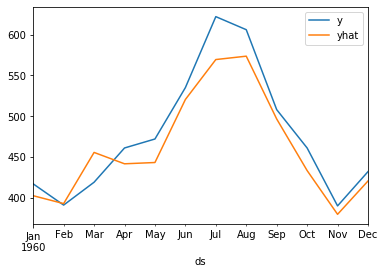

In [14]:
test.join(forecast.iloc[-12:]['yhat']).set_index('ds').plot();
